<a href="https://colab.research.google.com/github/saman-nia/hacker/blob/main/HackerPulse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Setup: Import Libraries**

First, I import the necessary libraries. These libraries are available in Google Colab.

In [1]:
# Import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# To display plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**2. Create the SQLite Database and Tables**

I create an in-memory SQLite database and define the tables for commits, tasks, and pull requests.

In [2]:
# Connect to SQLite database in memory
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create 'commits' table
cursor.execute('''
CREATE TABLE commits (
    commit_id INTEGER PRIMARY KEY,
    message TEXT,
    author TEXT,
    timestamp DATE,
    pull_request_id INTEGER
)
''')

# Create 'tasks' table
cursor.execute('''
CREATE TABLE tasks (
    task_id INTEGER PRIMARY KEY,
    title TEXT,
    status TEXT,
    assigned_to TEXT
)
''')

# Create 'pull_requests' table
cursor.execute('''
CREATE TABLE pull_requests (
    pull_request_id INTEGER PRIMARY KEY,
    title TEXT,
    description TEXT,
    task_id INTEGER
)
''')

**3. Insert Sample Data**

Now, I insert sample data related to hackerpulse.io and myself.

In [3]:
# Insert data into 'commits' table
commit_data = [
    # (commit_id, message, author, timestamp, pull_request_id)
    (1, 'Initial commit of the project', 'Saman Nia', '2023-01-01', None),
    (2, 'Add user authentication', 'Saman Nia', '2023-01-05', 1),
    (3, 'Fix login bug', 'Illia', '2023-01-05', 2),
    (4, 'Improve dashboard UI', 'Saman Nia', '2023-01-10', 3),
    (5, 'Update README file', 'Illia', '2023-01-10', None),
    (6, 'Optimize database queries', 'Saman Nia', '2023-01-15', 4),
    (7, 'Add unit tests', 'Illia', '2023-01-15', None),
    (8, 'Refactor codebase', 'Saman Nia', '2023-01-15', None),
    (9, 'Implement feature flagging', 'Illia', '2023-01-20', 5),
    (10, 'Fix caching issues', 'Saman Nia', '2023-01-25', 6),
    (11, 'Improve error handling', 'Illia', '2023-01-25', None),
    (12, 'Update dependencies', 'Saman Nia', '2023-01-25', None),
    # More commits can be added here
]

cursor.executemany('''
INSERT INTO commits (commit_id, message, author, timestamp, pull_request_id)
VALUES (?, ?, ?, ?, ?)
''', commit_data)

# Insert data into 'tasks' table
task_data = [
    # (task_id, title, status, assigned_to)
    (1, 'Implement user authentication', 'Completed', 'Saman Nia'),
    (2, 'Resolve login issues', 'Completed', 'Illia'),
    (3, 'Enhance dashboard design', 'In Progress', 'Saman Nia'),
    (4, 'Optimize database performance', 'Completed', 'Illia'),
    (5, 'Implement feature flagging', 'In Progress', 'Illia'),
    (6, 'Fix caching issues', 'Open', 'Saman Nia'),
    # More tasks can be added here
]

cursor.executemany('''
INSERT INTO tasks (task_id, title, status, assigned_to)
VALUES (?, ?, ?, ?)
''', task_data)

# Insert data into 'pull_requests' table
pr_data = [
    # (pull_request_id, title, description, task_id)
    (1, 'Merge authentication feature', 'Adding user authentication to the app', 1),
    (2, 'Fix for login bug', 'Corrected the issue with user login', 2),
    (3, 'Dashboard UI improvements', 'Updated the dashboard layout and styles', 3),
    (4, 'Database query optimization', 'Improved query performance', 4),
    (5, 'Feature flagging implementation', 'Implemented feature flags', 5),
    (6, 'Caching issues fix', 'Resolved caching problems', 6),
    # More pull requests can be added here
]

cursor.executemany('''
INSERT INTO pull_requests (pull_request_id, title, description, task_id)
VALUES (?, ?, ?, ?)
''', pr_data)

# Commit changes to the database
conn.commit()

**4. Verify the Data**

I check that the data has been inserted correctly.

In [4]:
# Display data from 'commits' table
print("Commits Table:")
commits_df = pd.read_sql_query("SELECT * FROM commits", conn)
display(commits_df)

# Display data from 'tasks' table
print("Tasks Table:")
tasks_df = pd.read_sql_query("SELECT * FROM tasks", conn)
display(tasks_df)

# Display data from 'pull_requests' table
print("Pull Requests Table:")
pull_requests_df = pd.read_sql_query("SELECT * FROM pull_requests", conn)
display(pull_requests_df)

Commits Table:


,commit_id,message,author,timestamp,pull_request_id
0,1,Initial commit of the project,Saman Nia,2023-01-01,NaN
1,2,Add user authentication,Saman Nia,2023-01-05,1.0
2,3,Fix login bug,Illia,2023-01-05,2.0
3,4,Improve dashboard UI,Saman Nia,2023-01-10,3.0
4,5,Update README file,Illia,2023-01-10,NaN
5,6,Optimize database queries,Saman Nia,2023-01-15,4.0
6,7,Add unit tests,Illia,2023-01-15,NaN
7,8,Refactor codebase,Saman Nia,2023-01-15,NaN
8,9,Implement feature flagging,Illia,2023-01-20,5.0
9,10,Fix caching issues,Saman Nia,2023-01-25,6.0


Tasks Table:


,task_id,title,status,assigned_to
0,1,Implement user authentication,Completed,Saman Nia
1,2,Resolve login issues,Completed,Illia
2,3,Enhance dashboard design,In Progress,Saman Nia
3,4,Optimize database performance,Completed,Illia
4,5,Implement feature flagging,In Progress,Illia
5,6,Fix caching issues,Open,Saman Nia


Pull Requests Table:


,pull_request_id,title,description,task_id
0,1,Merge authentication feature,Adding user authentication to the app,1
1,2,Fix for login bug,Corrected the issue with user login,2
2,3,Dashboard UI improvements,Updated the dashboard layout and styles,3
3,4,Database query optimization,Improved query performance,4
4,5,Feature flagging implementation,Implemented feature flags,5
5,6,Caching issues fix,Resolved caching problems,6


**5. Define Functions for Prompt Interpretation and Data Processing**

*Function: interpret_prompt(prompt)*

This function interprets the user's prompt and returns an SQL query, chart type, and title.

In [5]:
def interpret_prompt(prompt):
    """
    Interpret the user prompt and generate SQL query, chart type, and title using basic NLP.
    """
    prompt_lower = prompt.lower()
    chart_type = 'bar'  # Default chart type

    # Determine chart type based on keywords
    if 'over time' in prompt_lower or 'timeline' in prompt_lower:
        chart_type = 'line'
    elif 'distribution' in prompt_lower or 'pie chart' in prompt_lower:
        chart_type = 'pie'

    # Remove stopwords and tokenize
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in re.findall(r'\w+', prompt_lower) if word not in stop_words]

    # Initialize variables
    sql_query = None
    title = prompt

    # Check for 'commits over time' or similar phrases
    if ('commits' in tokens or 'commit' in tokens) and ('time' in tokens or 'date' in tokens or 'timeline' in tokens or 'over' in tokens):
        sql_query = '''
        SELECT timestamp AS label, COUNT(commit_id) AS value
        FROM commits
        GROUP BY timestamp
        ORDER BY timestamp
        '''
        title = 'Commits Over Time'

    # Other possible mappings
    elif ('commits' in tokens or 'commit' in tokens) and ('per' in tokens or 'by' in tokens):
        if 'author' in tokens:
            sql_query = '''
            SELECT author AS label, COUNT(commit_id) AS value
            FROM commits
            GROUP BY author
            '''
            title = 'Number of Commits per Author'
        elif 'task' in tokens:
            sql_query = '''
            SELECT t.title AS label, COUNT(c.commit_id) AS value
            FROM commits c
            JOIN pull_requests pr ON c.pull_request_id = pr.pull_request_id
            JOIN tasks t ON pr.task_id = t.task_id
            GROUP BY t.title
            '''
            title = 'Number of Commits per Task'
    elif 'tasks' in tokens and ('per' in tokens or 'by' in tokens):
        if 'status' in tokens:
            sql_query = '''
            SELECT status AS label, COUNT(task_id) AS value
            FROM tasks
            GROUP BY status
            '''
            title = 'Number of Tasks per Status'
    elif 'pull' in tokens and 'requests' in tokens and ('per' in tokens or 'by' in tokens):
        if 'task' in tokens:
            sql_query = '''
            SELECT t.title AS label, COUNT(pr.pull_request_id) AS value
            FROM tasks t
            JOIN pull_requests pr ON t.task_id = pr.task_id
            GROUP BY t.title
            '''
            title = 'Number of Pull Requests per Task'

    return sql_query, chart_type, title

**Function: execute_query(sql_query)**

This function executes the SQL query and returns the results as a DataFrame.

In [6]:
def execute_query(sql_query):
    """
    Execute the SQL query and return the result as a DataFrame.
    """
    if sql_query is None:
        return pd.DataFrame()
    else:
        try:
            df = pd.read_sql_query(sql_query, conn)
            return df
        except Exception as e:
            print("Error executing SQL query:", e)
            return pd.DataFrame()

**Function: process_data(df)**

This function processes the DataFrame for charting.

In [7]:
def process_data(df):
    """
    Process the DataFrame and extract labels and values for charting.
    """
    if df.empty or 'label' not in df.columns or 'value' not in df.columns:
        return [], []
    else:
        labels = df['label']
        values = df['value']
        return labels, values

**Function: generate_chart(labels, values, title, chart_type)**

This function generates and displays the chart.

In [8]:
def generate_chart(labels, values, title, chart_type):
    """
    Generate and display the chart based on labels, values, and chart type.
    """
    if len(labels) == 0 or len(values) == 0:
        print("No data available to generate a chart for this prompt.")
        return

    plt.figure(figsize=(10, 6))

    if chart_type == 'bar':
        plt.bar(labels, values, color='lightblue')
        plt.xlabel('Categories')
        plt.ylabel('Count')
    elif chart_type == 'line':
        plt.plot(labels, values, marker='o', linestyle='-', color='green')
        plt.xlabel('Date')
        plt.ylabel('Count')
    elif chart_type == 'pie':
        plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')
    else:
        print("Chart type not supported.")
        return

    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**6. Main Execution Flow**

Now, I put everything together in the main function.

In [9]:
def main():
    # Get user prompt
    prompt = input("Please enter your prompt: ")

    # Interpret the prompt
    sql_query, chart_type, title = interpret_prompt(prompt)
    print(f"\nGenerated SQL Query:\n{sql_query}")
    print(f"Chart Type: {chart_type}")
    print(f"Chart Title: {title}")

    # Execute the SQL query
    df = execute_query(sql_query)
    print("\nQuery Result:")
    display(df)

    # Process data for charting
    labels, values = process_data(df)

    # Generate the chart
    generate_chart(labels, values, title, chart_type)

Please enter your prompt: Show me the commits over time

Generated SQL Query:

        SELECT timestamp AS label, COUNT(commit_id) AS value
        FROM commits
        GROUP BY timestamp
        ORDER BY timestamp
        
Chart Type: line
Chart Title: Commits Over Time

Query Result:


,label,value
0,2023-01-01,1
1,2023-01-05,2
2,2023-01-10,2
3,2023-01-15,3
4,2023-01-20,1
5,2023-01-25,3


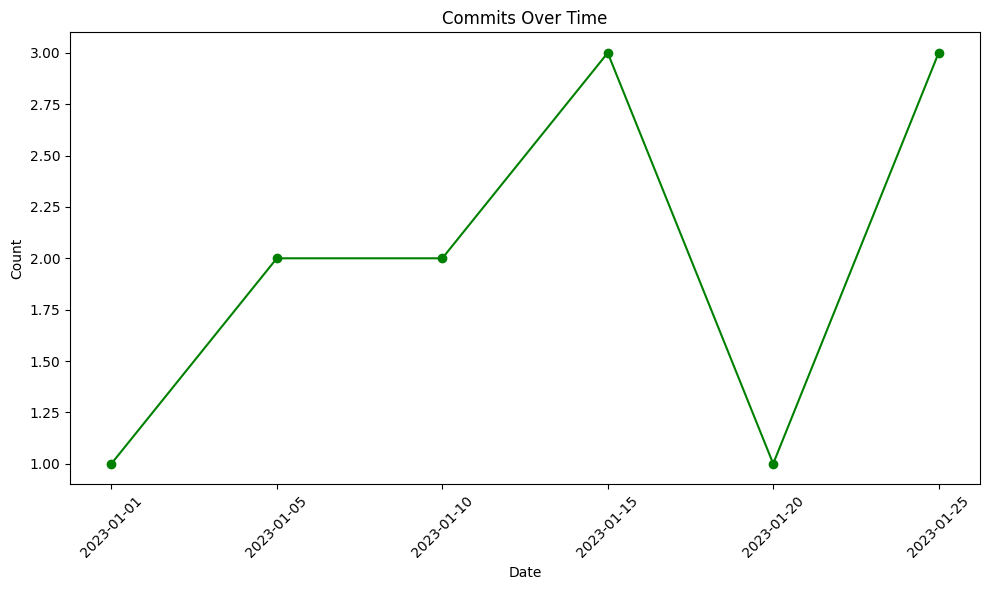

In [10]:
# Run the main function
main()

Please enter your prompt: Display the number of tasks per status

Generated SQL Query:

            SELECT status AS label, COUNT(task_id) AS value
            FROM tasks
            GROUP BY status
            
Chart Type: bar
Chart Title: Number of Tasks per Status

Query Result:


,label,value
0,Completed,3
1,In Progress,2
2,Open,1


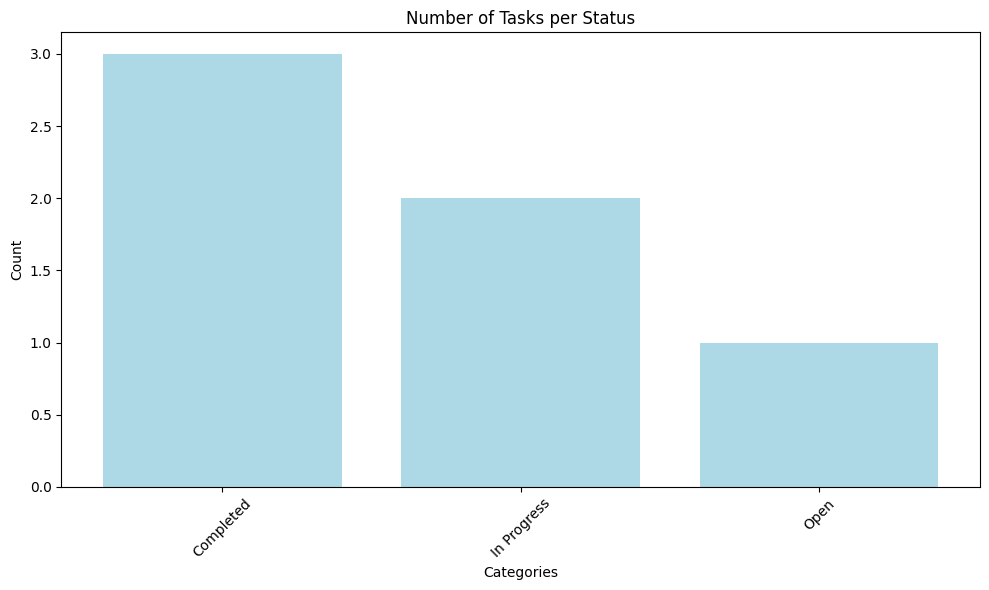

In [12]:
# Run the main function
main()